In [ ]:
# 참고 문헌: https://saynot.tistory.com/entry/Deep-Learning-MNIST-%EC%86%90%EA%B8%80%EC%94%A8-%EC%88%AB%EC%9E%90-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%9D%B8%EC%8B%9D%ED%95%B4%EB%B3%B4%EA%B8%B0

In [1]:
from keras.datasets import mnist

In [2]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


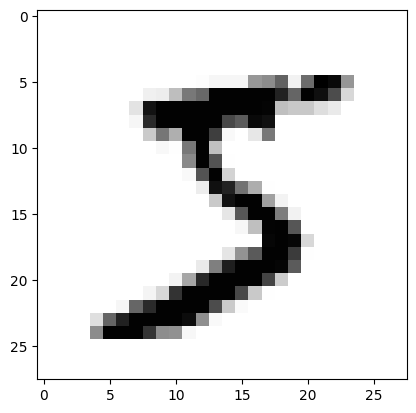

000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  003  018  018  018  126  136  175  026  166  255  247  127  000  000  000  000  
000  000  000  000  000  000  000  000  030  036  094  154  170  253  253  253  253  253  225  172  253  242  195  064  000  000  000  000  
000  000  000

In [18]:
# 이미지 형태 출력을 위한 pyplot 모듈 import
import matplotlib.pyplot as plt
# 위 60000개 데이터 배열에서 0번째 원소를 흑백으로 출력
plt.imshow(X_train[0], cmap='Greys')
plt.show()

################################
import sys
# 0번째 원소의 모든 데이터를 출력
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%03d  ' % i)
    sys.stdout.write('\n')

print(X_train[0][0])#첫번째 줄
print(X_train[0][27][27])# 마지막 줄 픽셀 정보 출력
print(Y_class_train[0])# 0번 원소 클래스 라벨링 정보

In [8]:
# 딥러닝에 필요한 케라스 함수 호출
from tensorflow.python.keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

# 필요 라이브러리 호출
import numpy
import tensorflow as tf

# 데이터 셋 호출
from keras.datasets import mnist

# 실행 시마다 같은 결과값 도출을 위한 시드 설정
numpy.random.seed(0)
tf.random.set_seed(0)

# 데이터를 불러와서 각 변수에 저장
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 학습에 적합한 형태로 데이터 가공
# 각 데이터는 학습을 위해 0~255에서 0~1사이의 숫자로 변환
# X_train.reshape(X_train.shape[0], 784)
# .astype('float32') # 255로 나누기 위해 float32로 반환
#  / 255 # 0~1사이 값으로 만듦
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# 클래스를 학습에 이용하기 위해 데이터 가공
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# 딥러닝 모델 구조 설정(2개층, 512개의 뉴런 연결, 10개 클래스 출력 뉴런, 784개 픽셀 input 값, relu와 softmax 활성화 함수 이용)
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 딥러닝 구조 설정(loss 옵션을 다중 클래스에 적합한 categorical_crossentropy, 옵티마이저는 adam 설정)
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# 모델 실행(X_test, Y_test로 검증, 200개씩 30번 학습)
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=2)

# 학습 정확도, 검증 정확도 출력
print('\nAccuracy: {:.4f}'.format(model.evaluate(X_train, Y_train)[1]))
print('\nVal_Accuracy: {:.4f}'.format(model.evaluate(X_test, Y_test)[1]))

# 모델 저장
model.save('Predict_Model.h5')



Epoch 1/30


300/300 - 7s - loss: 0.3041 - accuracy: 0.9147 - val_loss: 0.1522 - val_accuracy: 0.9555 - 7s/epoch - 22ms/step
Epoch 2/30
300/300 - 4s - loss: 0.1265 - accuracy: 0.9637 - val_loss: 0.1053 - val_accuracy: 0.9687 - 4s/epoch - 12ms/step
Epoch 3/30
300/300 - 3s - loss: 0.0831 - accuracy: 0.9762 - val_loss: 0.0827 - val_accuracy: 0.9754 - 3s/epoch - 11ms/step
Epoch 4/30
300/300 - 3s - loss: 0.0604 - accuracy: 0.9825 - val_loss: 0.0758 - val_accuracy: 0.9756 - 3s/epoch - 9ms/step
Epoch 5/30
300/300 - 3s - loss: 0.0466 - accuracy: 0.9868 - val_loss: 0.0683 - val_accuracy: 0.9780 - 3s/epoch - 9ms/step
Epoch 6/30
300/300 - 3s - loss: 0.0354 - accuracy: 0.9899 - val_loss: 0.0643 - val_accuracy: 0.9790 - 3s/epoch - 10ms/step
Epoch 7/30
300/300 - 3s - loss: 0.0267 - accuracy: 0.9929 - val_loss: 0.0614 - val_accuracy: 0.9804 - 3s/epoch - 9ms/step
Epoch 8/30
300/300 - 3s - loss: 0.0210 - accuracy: 0.9949 - val_loss: 0.0608 - val_accuracy: 0.9810 - 3s/epoch - 9ms/step
Epoch 9/30
300/3

d:\Users\skadl\anaconda3\envs\OCR\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# 모델 로드

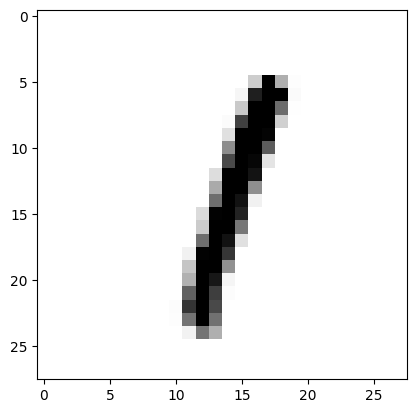

In [80]:
# 딥러닝에 필요한 케라스 함수 호출
from keras.models import load_model
# from keras.utils import np_utils
# import name 'np_utils' from 'keras.utils' 오류시 아래 명령어로 수행
from tensorflow.python.keras.utils import np_utils

# 필요 라이브러리 호출(PIL은 이미지파일 처리위함)
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

# text.png는 그림판에서 붓으로 숫자 7을 그린 이미지 파일
# text.png 파일 열어서 L(256단계 흑백이미지)로 변환
# img = Image.open("text.jpg").convert("L")
img=X_test[5]

plt.imshow(img, cmap='Greys')


In [81]:
# 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))

# 데이터를 모델에 적용할 수 있도록 가공
test_data = ((np.array(img) / 255) - 1) * -1


In [82]:
# 모델 불러오기
model = load_model('Predict_Model.h5')



In [83]:
# 클래스 예측 함수에 가공된 테스트 데이터 넣어 결과 도출
# res =(model.predict(test_data) > 0.5).astype("int32")
res=model.predict(test_data, verbose=0).argmax(axis=-1)

print(res)

[5]


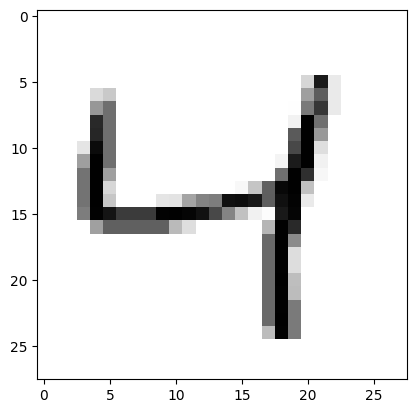

000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  067  232  039  000  000  000  000  000  
000  000  000  000  062  081  000  000  000  000  000  000  000  000  000  000  000  000  000  000  120  180  039  000  000  000  000  000  
000  000  000

In [52]:
# 이미지 형태 출력을 위한 pyplot 모듈 import
import matplotlib.pyplot as plt
# 위 60000개 데이터 배열에서 0번째 원소를 흑백으로 출력
plt.imshow(X_train[2], cmap='Greys')
plt.show()

################################
import sys
# 0번째 원소의 모든 데이터를 출력
for x in X_train[2]:
    for i in x:
        sys.stdout.write('%03d  ' % i)
    sys.stdout.write('\n')

print(Y_class_train[2])# 0번 원소 클래스 라벨링 정보

결론: 높은 예측률과 달리 답을 제대로 하지 못함.    
개선 방법: 모델에 대한 이해 부족? 결과를 내는게 이상한 것으로 예측. colab에서 재 시도 진행